Data augmentation is a powerful technique to improve the performance of Convolutional Neural Networks (CNNs), especially when the dataset is limited or the model is overfitting. By augmenting the dataset, we artificially increase the number and diversity of images by applying random transformations. This process helps the CNN learn more robust features and generalize better to new data.

**Key Points of Data Augmentation in CNNs:**
1. Why Augmentation?


*   Augmentation helps address overfitting by providing more varied data to the network.
*   Allows the network to learn invariance to certain transformations like rotation, scaling, and translation, which often occur in real-world data.

2. Types of Augmentation Techniques:


*   **Rotation:** Rotates the image by a random degree within a specified range. Useful for data that can appear at different orientations.
*  **Width and Height Shift:** Randomly shifts the image vertically and/or horizontally, helping the model learn spatial invariance.


*   **Shear:** Tilts the image by a certain angle, useful in cases where perspectives in images vary.
*  **Zoom:** Zooms in or out by a random factor, helping the model learn from both close-up and distant views.



*  **Horizontal/Vertical Flip:** Flips the image horizontally or vertically, good for data that doesn’t have a preferred direction.
* **Brightness/Contrast Adjustment:** Randomly alters the brightness or contrast to help the model generalize to lighting conditions.



*  **Channel Shift:** Changes color intensity of RGB channels, making the model invariant to different lighting and color variations

3. **Implementing Augmentation in CNN Code with Keras:**


*   The ImageDataGenerator class in Keras offers a straightforward way to apply data augmentation.
4. **Using Augmented Data in Model Training:**

*   The augmented images are generated in real-time, meaning they are created as the model is being trained. This saves memory and provides fresh augmented images at each training iteration.






















In [7]:
# CNN with Augmentation on Fashion MNIST

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt




In [9]:
#load and preprocess the data
(X_train, y_train),(X_test, y_test)=fashion_mnist.load_data()
X_train = X_train.reshape(-1,28,28,1).astype('float32')/255
X_test = X_test.reshape(-1,28,28,1).astype('float32')/255

In [10]:
# Define Data Augmentation Generator
datagen = ImageDataGenerator(
    rotation_range = 15, # Rotate images upto 15 degrees
    width_shift_range = 0.1, # Shift images horizontally by upto 10%
    height_shift_range = 0.1, # Shift images vertically by upto 10%
    shear_range = 0.1, # shear Transformation
    zoom_range = 0.1, # Zoom in/out by upto 10%
    horizontal_flip = True,
)

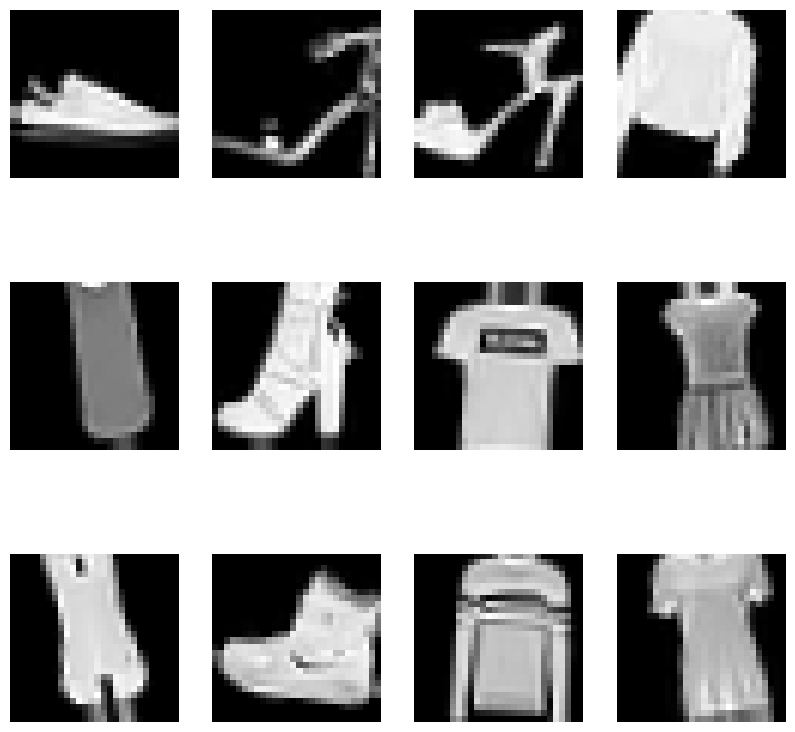

In [11]:
# Display some Augmented Images
for X_batch, y_batch in datagen.flow(X_train[:12], y_train[:12], batch_size=12):
  plt.figure(figsize=(10,10))
  for i in range(12):
    plt.subplot(3,4, i + 1)
    plt.imshow(X_batch[i].reshape(28,28),cmap='gray')
    plt.axis('off')
  plt.show()
  break

In [12]:
# Define CNN model
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu' ),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile Model
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
# Train Model with Augmented data

history = model.fit(
    datagen.flow(X_train, y_train, batch_size = 32),
    epochs = 10,
    validation_data = (X_test, y_test)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - accuracy: 0.6235 - loss: 1.0329 - val_accuracy: 0.7917 - val_loss: 0.5114
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7639 - loss: 0.6284 - val_accuracy: 0.8360 - val_loss: 0.4367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 46ms/step - accuracy: 0.7935 - loss: 0.5530 - val_accuracy: 0.8537 - val_loss: 0.3955
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 44ms/step - accuracy: 0.8110 - loss: 0.5117 - val_accuracy: 0.8623 - val_loss: 0.3724
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8233 - loss: 0.4808 - val_accuracy: 0.8694 - val_loss: 0.3613
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 45ms/step - accuracy: 0.8254 - loss: 0.4665 - val_accuracy: 0.8729 - val_loss: 0.3587
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 44ms/step - accuracy: 0.8323 - loss: 0.4547 - val_accuracy: 0.8698 - val_loss: 0.3589
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8385 - loss: 

In [15]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8886 - loss: 0.3145
Test Accuracy: 0.8849999904632568


# Explanation of the Code


*   **Data Augmentation (ImageDataGenerator):** We define transformations with ImageDataGenerator, specifying the range of rotations, shifts, shear, zoom, and flips.

*  **Visualizing Augmentation:** Displaying a few augmented images helps verify the transformations.
*   **Model Definition:** A simple CNN model with two convolutional layers, followed by max pooling, a dropout layer to reduce overfitting, and a dense output layer.


*   **Training:** The fit function takes datagen.flow as input, allowing for on-the-fly generation of augmented images. This trains the CNN on new images at each epoch


# Key Takeaways:


*   **Generalization:** Data augmentation helps the CNN become more robust and achieve better generalization on unseen data.

*   **Real-Time Augmentation:** The data generator feeds new variations of the training data in each epoch, making training dynamic.
*   **Reduced Overfitting:** The CNN learns to identify features more accurately due to exposure to a wide range of transformations.


**This approach, combined with a well-defined CNN, can yield improved performance and better model robustness. **


